## Dev feature space visualization with PCA and t-SNE

In [1]:
from src.utils import explain_label, load_data
X_train, y_train, X_val, y_val = load_data(train_path="data/train.csv", val_path="data/dev.txt")

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

vectorizer = TfidfVectorizer()
scaler = StandardScaler(with_mean=False)
X = vectorizer.fit_transform(X_train)
X = scaler.fit_transform(X)

X_val = vectorizer.transform(X_val)
X_val = scaler.transform(X_val)


In [3]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=1000)
data = pca.fit_transform(X_val)

In [4]:
import numpy as np
np.sum(pca.explained_variance_ratio_)

0.6872320185488369

In [5]:
from sklearn.manifold import TSNE

tnse = TSNE(n_components=2, n_iter=3000, metric='cosine', n_jobs=-1, init='random', learning_rate='auto', square_distances='legacy')
X_embedded = tnse.fit_transform(data)

/opt/homebrew/Caskroom/miniforge/base/envs/cs4nlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


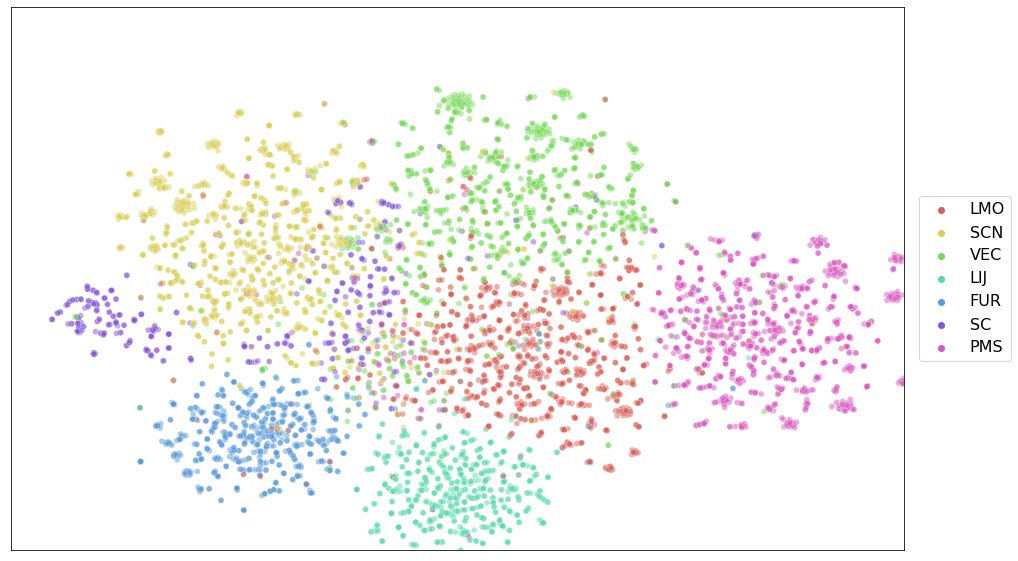

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.axes_style("whitegrid")

df = pd.DataFrame()
df['tsne-2d-one'] = X_embedded[:,0]
df['tsne-2d-two'] = X_embedded[:,1]
df['Dialect'] = y_val
from src.utils import explain_label
df['Dialect'] = df['Dialect'].apply(explain_label)

fig = plt.figure(figsize = (16,10))

targets = ['EML', 'NAP', 'PMS', 'FUR', 'LLD', 'LIJ', 'LMO', 'ROA_TARA', 'SCN', 'VEC','SC']

ax = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Dialect",
    palette=sns.color_palette("hls", 7),
    data=df,
    legend=targets,
    alpha=0.5   
)

ax.grid(False)
ax.set(xticklabels=[], yticklabels=[])
ax.set_xticks([])
ax.set_yticks([])
ax.set(xlabel='', ylabel='')
ax.set_title(label='')
ax.legend(loc='center left', bbox_to_anchor=(1.008, 0.5), prop={'size': 16})

ax.set_xlim(left=-120, right=120) # only tfidf
ax.set_ylim(top=130, bottom=-100) # only tfidf

plt.savefig('plots/visual_logreg.pdf', bbox_inches='tight')